<a href="https://colab.research.google.com/github/sipocz/messer/blob/main/messer_villamos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Page #2


# Villamos Energia mérések


In [2]:
# !pip install lazypredict # nem használjuk, de majd meglátjuk

In [3]:
import plotly.express as px
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import zipfile
#import lazypredict
#from lazypredict.Supervised import LazyRegressor # nem használjuk, de majd meglátjuk

In [4]:
fname="SB_1TRE_1_4_R00274.zip"
url="https://github.com/sipocz/messer/blob/main/"+fname
basedir="/content/"
localfname=basedir+fname
print (f"!rm {localfname}")
print(f"!wget {url}")

!rm /content/SB_1TRE_1_4_R00274.zip
!wget https://github.com/sipocz/messer/blob/main/SB_1TRE_1_4_R00274.zip


In [5]:
#Nitrogén predikció
!rm /content/SB_1TRE_1_4_R00274
!rm /content/SB_1TRE_1_4_R00274.zip
!wget https://github.com/sipocz/messer/raw/main/SB_1TRE_1_4_R00274.zip
!unzip /content/SB_1TRE_1_4_R00274.zip 
!rm /content/SB_1TRE_1_4_R00274.zip


rm: cannot remove '/content/SB_1TRE_1_4_R00274': No such file or directory
rm: cannot remove '/content/SB_1TRE_1_4_R00274.zip': No such file or directory
--2021-03-13 08:34:14--  https://github.com/sipocz/messer/raw/main/SB_1TRE_1_4_R00274.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sipocz/messer/main/SB_1TRE_1_4_R00274.zip [following]
--2021-03-13 08:34:14--  https://raw.githubusercontent.com/sipocz/messer/main/SB_1TRE_1_4_R00274.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25759170 (25M) [application/zip]
Saving to: ‘SB_1TRE_1_4_R00274.zip’

SB_1TRE_1_4_R00274. 100%[============

In [6]:
df=pd.read_csv(localfname[:-4], usecols=[1,2,3],header=None )

In [7]:
df.columns=["Date","Time","A"]


In [8]:
df2=df.Date+df.Time
df_all=pd.DataFrame(data={"timeStamp":df2,"A":df.A})

df_all.head()
a=df_all.timeStamp[0]

In [9]:
df2.head()

0     2020. 1. 3  0. 2. 1
1     2020. 1. 3  0. 3.21
2     2020. 1. 3  0. 4.51
3     2020. 1. 3  0. 4.56
4     2020. 1. 3  0.14.28
dtype: object

In [10]:
db=0
for i in df_all.index:
    a=df2.loc[i]
    b=a.strip().replace(". ",".0").replace("  "," 0")
    #db+=1
    #if db%100000==0: 
    #    print("#",end="")

    df2.loc[i]=b

In [11]:
df2.head()

0    2020.01.03 00.02.01
1    2020.01.03 00.03.21
2    2020.01.03 00.04.51
3    2020.01.03 00.04.56
4    2020.01.03 00.14.28
dtype: object

In [12]:

df_all=pd.DataFrame(data={"timeStamp":df2,"A":df.A})

df_all.head()


timeStamp        A
0  2020.01.03 00.02.01  19.7461
1  2020.01.03 00.03.21  20.0571
2  2020.01.03 00.04.51  21.2830
3  2020.01.03 00.04.56  19.8935
4  2020.01.03 00.14.28  21.4223

In [13]:
df_all["timeStamp"]=pd.to_datetime(df_all["timeStamp"],format="%Y.%m.%d %H.%M.%S")

In [14]:
df_all.head()

timeStamp        A
0 2020-01-03 00:02:01  19.7461
1 2020-01-03 00:03:21  20.0571
2 2020-01-03 00:04:51  21.2830
3 2020-01-03 00:04:56  19.8935
4 2020-01-03 00:14:28  21.4223

In [15]:
pro_df=pd.DataFrame(data={"ds":df_all.timeStamp,"y":df_all.A})

In [16]:
pro_df

ds        y
0       2020-01-03 00:02:01  19.7461
1       2020-01-03 00:03:21  20.0571
2       2020-01-03 00:04:51  21.2830
3       2020-01-03 00:04:56  19.8935
4       2020-01-03 00:14:28  21.4223
...                     ...      ...
2714584 2020-12-17 11:51:45   2.9317
2714585 2020-12-17 11:51:57   6.0996
2714586 2020-12-17 11:52:05   2.8609
2714587 2020-12-17 11:52:22   4.1359
2714588 2020-12-31 01:42:37   0.1527

[2714589 rows x 2 columns]

In [17]:
pro_df.head()
pro_df.set_index("ds",inplace=True)

In [18]:
resample_mean =  pro_df.resample("10min").agg({'y': 'mean'})

In [19]:
pro_df=resample_mean

In [20]:
pro_df

y
ds                            
2020-01-03 00:00:00  20.244925
2020-01-03 00:10:00  20.679750
2020-01-03 00:20:00  20.727150
2020-01-03 00:30:00  20.787167
2020-01-03 00:40:00  20.236400
...                        ...
2020-12-31 01:00:00        NaN
2020-12-31 01:10:00        NaN
2020-12-31 01:20:00        NaN
2020-12-31 01:30:00        NaN
2020-12-31 01:40:00   0.152700

[52283 rows x 1 columns]

In [21]:
pro_df.index

DatetimeIndex(['2020-01-03 00:00:00', '2020-01-03 00:10:00',
               '2020-01-03 00:20:00', '2020-01-03 00:30:00',
               '2020-01-03 00:40:00', '2020-01-03 00:50:00',
               '2020-01-03 01:00:00', '2020-01-03 01:10:00',
               '2020-01-03 01:20:00', '2020-01-03 01:30:00',
               ...
               '2020-12-31 00:10:00', '2020-12-31 00:20:00',
               '2020-12-31 00:30:00', '2020-12-31 00:40:00',
               '2020-12-31 00:50:00', '2020-12-31 01:00:00',
               '2020-12-31 01:10:00', '2020-12-31 01:20:00',
               '2020-12-31 01:30:00', '2020-12-31 01:40:00'],
              dtype='datetime64[ns]', name='ds', length=52283, freq='10T')

In [22]:
fb_df=pd.DataFrame(data={"ds":pro_df.index,"y":pro_df.y})

In [23]:
fb_df.head()

ds          y
ds                                                
2020-01-03 00:00:00 2020-01-03 00:00:00  20.244925
2020-01-03 00:10:00 2020-01-03 00:10:00  20.679750
2020-01-03 00:20:00 2020-01-03 00:20:00  20.727150
2020-01-03 00:30:00 2020-01-03 00:30:00  20.787167
2020-01-03 00:40:00 2020-01-03 00:40:00  20.236400

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


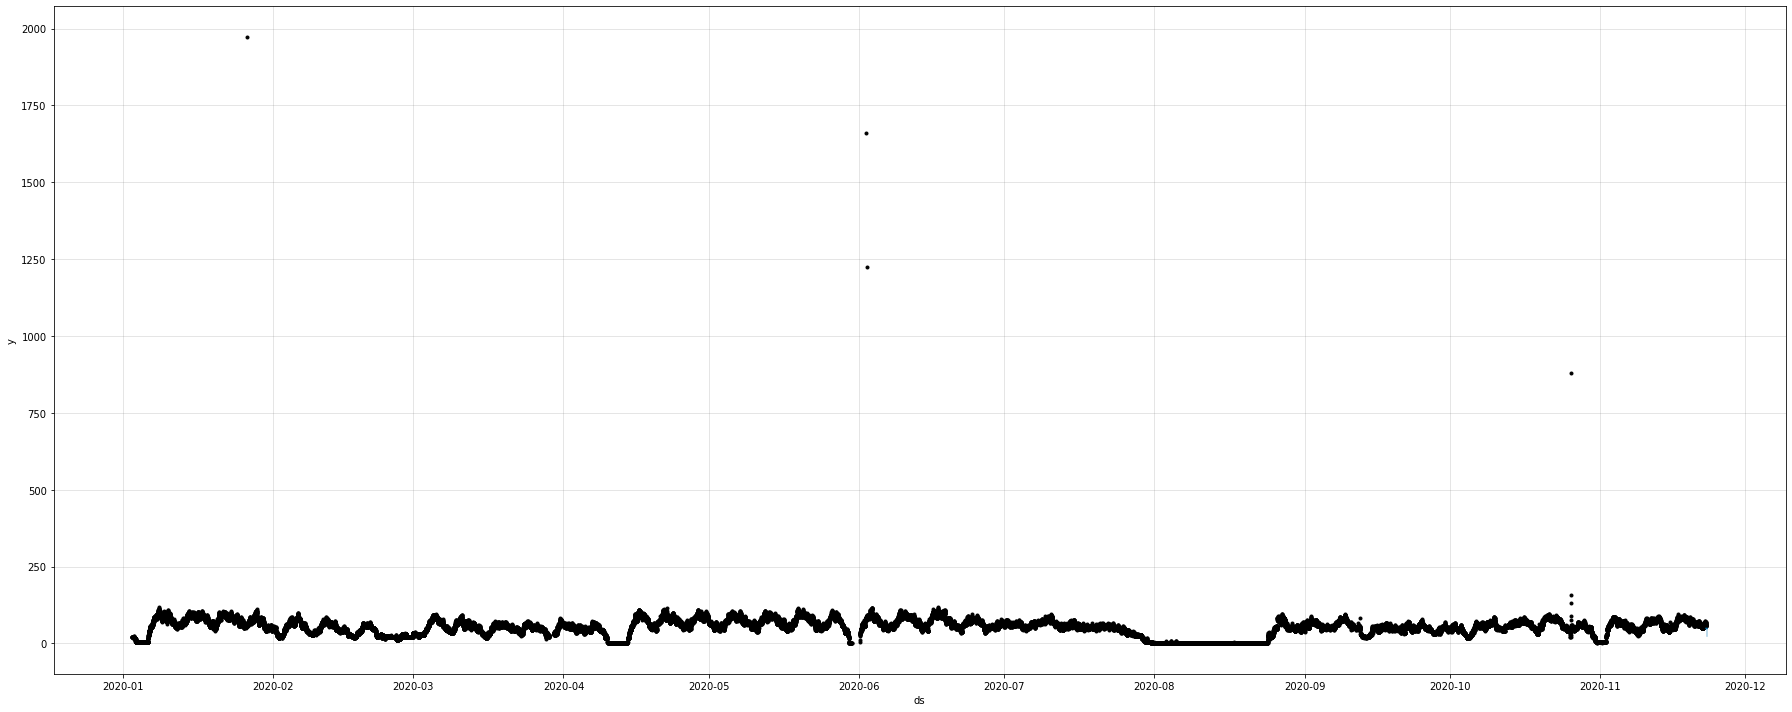

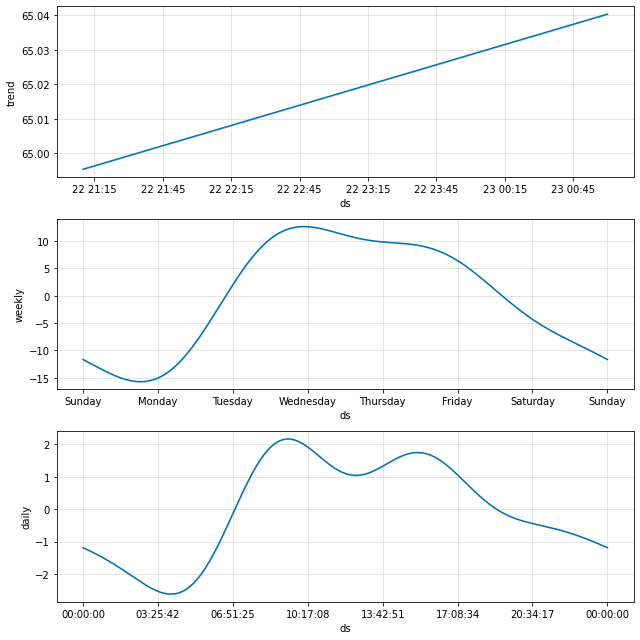

In [24]:
DX=24
X1=-5500
DX1=X1+DX
from fbprophet import Prophet
m = Prophet(weekly_seasonality=True,growth="linear")

m.fit(fb_df[:X1])
forecast = m.predict(fb_df[X1:DX1],)

profet_graf=m.plot(forecast,figsize=(25,10),)
m.plot_components(forecast);

In [25]:

# Python
from fbprophet.plot import plot_plotly, plot_components_plotly
import plotly.graph_objects as go
from plotly import tools
import plotly.express as px
import pandas as pd

fbfig=plot_plotly(m, forecast)


fbfig.update_layout(
    autosize=False,
    width=1600,
    height=900,
    
    )

fbfig.add_trace(
    go.Scatter(x=fb_df[X1:DX1].ds, y=pro_df[X1:DX1].y,
            name="Test data",
            showlegend=True,
            mode="markers",
            marker=dict(color='rgba(200,0,0,0.9)', 
            symbol="diamond")   ),
 
   
    


)


fbfig.show()

In [26]:
print(f"{fb_df.y.isnull().sum()} db NAN van a DF-ben" )
fb_df.dropna(inplace=True)
print(f"{fb_df['y'].isnull().sum()} db NAN van a DF-ben" )

4775 db NAN van a DF-ben
0 db NAN van a DF-ben


In [27]:
X = list(fb_df.y)
print(X)
XX=[[xi] for xi in X] 
print(XX)

[20.244925, 20.67975, 20.72715, 20.787166666666668, 20.2364, 20.4796, 20.406366666666667, 20.8266, 20.4858, 20.25158, 20.42296, 20.30516, 20.525399999999998, 20.565033333333332, 20.578850000000003, 20.548000000000002, 20.592200000000002, 20.4863, 19.9612, 20.557775, 20.616133333333334, 20.442914285714288, 20.663933333333333, 20.667933333333334, 20.610233333333333, 20.769825, 20.4631, 20.37148, 20.7547, 19.9537, 20.211399999999998, 19.66385, 19.5141, 19.9713, 19.485120000000002, 19.454900000000002, 19.73225, 20.910742857142857, 18.7167, 18.082250000000002, 18.57994, 18.714333333333332, 18.70854, 18.90045, 18.8128, 18.862116666666665, 20.90051111111111, 17.7627, 17.901639999999997, 17.0509, 17.203133333333337, 17.2264, 17.476654545454544, 17.396658000000002, 17.9414, 18.385474603174593, 17.924551724137928, 18.0534, 17.893549999999998, 17.930366666666664, 14.65894117647059, 17.29933, 17.72305806451613, 18.064182608695653, 23.170056249999995, 24.515236842105264, 17.855500000000003, 14.0326

In [28]:
from sklearn.cluster import DBSCAN
import numpy as np


clustering = DBSCAN(eps=10, min_samples=5).fit(XX)
print(clustering.labels_)


[0 0 0 ... 0 0 0]


In [29]:
print(min(clustering.labels_))
fb_df.describe()

-1


y
count  47508.000000
mean      55.308767
std       27.086117
min        0.064900
25%       44.259456
50%       56.339528
75%       71.007815
max     1973.536952

In [30]:
print (fb_df.describe())

amax=df.max
o=[index for (index,i) in enumerate(clustering.labels_) if i<0]
print(o)
print(clustering.labels_[o])
print(fb_df.y[o])


                  y
count  47508.000000
mean      55.308767
std       27.086117
min        0.064900
25%       44.259456
50%       56.339528
75%       71.007815
max     1973.536952
[3398, 20777, 20817, 40603, 40605, 40606]
[-1 -1 -1 -1 -1 -1]
ds
2020-01-26 14:20:00    1973.536952
2020-06-02 08:50:00    1661.003894
2020-06-02 15:30:00    1223.280034
2020-10-25 22:40:00     130.220912
2020-10-25 23:00:00     879.539036
2020-10-25 23:10:00     157.103464
Name: y, dtype: float64


In [31]:
print("Ezek lesznek az Outlierek")
print(fb_df.y[o])
print("\n\nAz eredeti Dataframe:\n",fb_df.describe())
fb_df_clear=fb_df.drop(fb_df.index[o])
print("\n\nA végleges Dataframe:\n",fb_df_clear.describe())

Ezek lesznek az Outlierek
ds
2020-01-26 14:20:00    1973.536952
2020-06-02 08:50:00    1661.003894
2020-06-02 15:30:00    1223.280034
2020-10-25 22:40:00     130.220912
2020-10-25 23:00:00     879.539036
2020-10-25 23:10:00     157.103464
Name: y, dtype: float64


Az eredeti Dataframe:
                   y
count  47508.000000
mean      55.308767
std       27.086117
min        0.064900
25%       44.259456
50%       56.339528
75%       71.007815
max     1973.536952


A végleges Dataframe:
                   y
count  47502.000000
mean      55.188923
std       23.635520
min        0.064900
25%       44.253925
50%       56.333657
75%       71.002710
max      118.849194


In [32]:
from fbprophet.plot import plot_plotly, plot_components_plotly
import plotly.graph_objects as go
from plotly import tools
import plotly.express as px
import pandas as pd
from plotly.subplots import make_subplots
X1=0
DX1=-1
fbfig1 = make_subplots(rows=1, cols=1,shared_xaxes=True)

fbfig1.update_layout(
    autosize=False,
    width=1600,
    height=900,
    
    )

fbfig1.add_trace(
    go.Scatter(x=fb_df_clear[X1:DX1].ds, y=fb_df_clear[X1:DX1].y,
            name="Test data",
            showlegend=True,
            mode="markers",
            marker=dict(color='rgba(100,200,100,0.9)', 
            symbol="diamond")   ),
 
   
    


)


fbfig1.show()

In [57]:

e_resample_mean =  fb_df_clear.resample("60min").agg({'y': 'mean'})  # újramintázzuk a jeleket, pl órás átlagokkal számoljunk
e_resample_max =  fb_df_clear.resample("60min").agg({'y': 'max'})  # újramintázzuk a jeleket, pl órás átlagokkal számoljunk
e_resample_min =  fb_df_clear.resample("60min").agg({'y': 'min'})  # újramintázzuk a jeleket, pl órás átlagokkal számoljunk

e_df=pd.DataFrame({"E_Max":e_resample_max.y,"E_Min":e_resample_min.y,"E_Mean":e_resample_mean.y})
e_df.head()

E_Max     E_Min     E_Mean
ds                                                 
2020-01-03 00:00:00  20.787167  20.23640  20.525832
2020-01-03 01:00:00  20.826600  20.25158  20.449744
2020-01-03 02:00:00  20.592200  20.48630  20.549297
2020-01-03 03:00:00  20.667933  19.96120  20.484982
2020-01-03 04:00:00  20.769825  19.95370  20.487173

In [58]:
!rm /content/all.csv
!wget "https://github.com/sipocz/messer/raw/main/all.csv"
!head /content/all.csv

--2021-03-13 08:52:16--  https://github.com/sipocz/messer/raw/main/all.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sipocz/messer/main/all.csv [following]
--2021-03-13 08:52:16--  https://raw.githubusercontent.com/sipocz/messer/main/all.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6249032 (6.0M) [text/plain]
Saving to: ‘all.csv’

all.csv             100%[===================>]   5.96M  24.8MB/s    in 0.2s    

2021-03-13 08:52:16 (24.8 MB/s) - ‘all.csv’ saved [6249032/6249032]

timeStamp,LIN_V,LIN_P,PSA_M,PSA_P,PSA_Q
2019-11-21 09:58:15,32356.38,9.0,626.1,7.6,0.2749
2019-11-21 10:03

In [59]:
_PCVERSION_=False
_GITHUB_ORIG=True

if _PCVERSION_:
    basedir="C:/Users/sipocz/OneDrive/Dokumentumok/GitHub/nitrogen"
else:

    if _GITHUB_ORIG:
        basedir="/content/"
    else:
        from google.colab import drive
        drive.mount('/content/drive',force_remount=True)
        basedir="/content/drive/My Drive/001_AI/messer/nitrogen/"
print(basedir)  


/content/


In [60]:
df=pd.read_csv(basedir+"all.csv")
df.head()

timeStamp     LIN_V  LIN_P  PSA_M  PSA_P   PSA_Q
0  2019-11-21 09:58:15  32356.38   9.00  626.1    7.6  0.2749
1  2019-11-21 10:03:16  32346.85   9.00  663.1    7.7  0.2761
2  2019-11-21 10:03:21  32347.00   8.59  663.1    7.7  0.2761
3  2019-11-21 10:08:22  32350.00   8.61  548.9    7.7  0.2737
4  2019-11-21 10:13:21  32327.00   8.62  492.5    7.7  0.2694

In [61]:
df["timeStamp"]=pd.to_datetime(df["timeStamp"],format="%Y.%m.%d %H:%M:%S")   # konvertáljuk az időbélyeget


d=df[["timeStamp","PSA_M","PSA_P"]]
d.set_index("timeStamp",inplace=True)

In [62]:
agg_10m = d.groupby([pd.Grouper(freq='D')])
n_resample_mean =  d.resample("60min").agg({'PSA_M': 'mean'})  # újramintázzuk a jeleket, pl órás átlagokkal számoljunk
n_resample_max =  d.resample("60min").agg({'PSA_M': 'max'})    # újramintázzuk a jeleket, pl órás maximumok
n_resample_min =  d.resample("60min").agg({'PSA_M': 'min'})    # újramintázzuk a jeleket, pl órás minimumok
p_resample_mean =  d.resample("60min").agg({'PSA_P': 'mean'})  # újramintázzuk a jeleket, pl órás átlagokkal számoljunk
p_resample_max =  d.resample("60min").agg({'PSA_P': 'max'})    # újramintázzuk a jeleket, pl órás maximumok
p_resample_min =  d.resample("60min").agg({'PSA_P': 'min'})    # újramintázzuk a jeleket, pl órás minimumok


n_df=pd.DataFrame({"N_Max":n_resample_max.PSA_M,"N_Min":n_resample_min.PSA_M, "N_Mean":n_resample_mean.PSA_M,
                    "P_Max":p_resample_max.PSA_P,"P_Min":p_resample_min.PSA_P, "P_Mean":p_resample_mean.PSA_P                   
                   })

In [63]:
n_df.head()

N_Max  N_Min      N_Mean  P_Max  P_Min    P_Mean
timeStamp                                                            
2019-11-21 09:00:00  626.1  626.1  626.100000    7.6    7.6  7.600000
2019-11-21 10:00:00  723.9  492.5  621.430769    7.7    7.5  7.623077
2019-11-21 11:00:00  769.0  554.5  654.033333    7.6    7.4  7.533333
2019-11-21 12:00:00  764.6  578.8  685.525000    7.7    7.4  7.558333
2019-11-21 13:00:00  662.5  500.4  580.333333    7.7    7.6  7.658333

In [64]:
e_df.index

DatetimeIndex(['2020-01-03 00:00:00', '2020-01-03 01:00:00',
               '2020-01-03 02:00:00', '2020-01-03 03:00:00',
               '2020-01-03 04:00:00', '2020-01-03 05:00:00',
               '2020-01-03 06:00:00', '2020-01-03 07:00:00',
               '2020-01-03 08:00:00', '2020-01-03 09:00:00',
               ...
               '2020-12-30 16:00:00', '2020-12-30 17:00:00',
               '2020-12-30 18:00:00', '2020-12-30 19:00:00',
               '2020-12-30 20:00:00', '2020-12-30 21:00:00',
               '2020-12-30 22:00:00', '2020-12-30 23:00:00',
               '2020-12-31 00:00:00', '2020-12-31 01:00:00'],
              dtype='datetime64[ns]', name='ds', length=8714, freq='60T')

In [65]:
df=n_df.join(e_df)

In [66]:
df.head()

N_Max  N_Min      N_Mean  ...  E_Max  E_Min  E_Mean
timeStamp                                      ...                      
2019-11-21 09:00:00  626.1  626.1  626.100000  ...    NaN    NaN     NaN
2019-11-21 10:00:00  723.9  492.5  621.430769  ...    NaN    NaN     NaN
2019-11-21 11:00:00  769.0  554.5  654.033333  ...    NaN    NaN     NaN
2019-11-21 12:00:00  764.6  578.8  685.525000  ...    NaN    NaN     NaN
2019-11-21 13:00:00  662.5  500.4  580.333333  ...    NaN    NaN     NaN

[5 rows x 9 columns]

In [67]:
print(f"{df.E_Mean.isnull().sum()} db NAN van a DF-ben" )
df.dropna(inplace=True)
print(f"{df.E_Mean.isnull().sum()} db NAN van a DF-ben" )

2062 db NAN van a DF-ben
0 db NAN van a DF-ben


In [68]:
df.head()

N_Max  N_Min      N_Mean  ...      E_Max     E_Min     E_Mean
timeStamp                                      ...                                
2020-01-03 00:00:00  492.6    0.0  282.216667  ...  20.787167  20.23640  20.525832
2020-01-03 01:00:00  579.1    0.0  122.250000  ...  20.826600  20.25158  20.449744
2020-01-03 02:00:00  427.1    0.0  288.975000  ...  20.592200  20.48630  20.549297
2020-01-03 03:00:00  530.3    0.0  107.450000  ...  20.667933  19.96120  20.484982
2020-01-03 04:00:00  526.2    0.0  269.866667  ...  20.769825  19.95370  20.487173

[5 rows x 9 columns]

In [69]:
df.corr()

N_Max     N_Min    N_Mean  ...     E_Max     E_Min    E_Mean
N_Max   1.000000 -0.007319  0.992257  ... -0.032342 -0.032432 -0.032495
N_Min  -0.007319  1.000000 -0.007082  ...  0.182540  0.181112  0.181478
N_Mean  0.992257 -0.007082  1.000000  ... -0.031301 -0.031380 -0.031440
P_Max   0.002797 -0.980416  0.002706  ... -0.076186 -0.075237 -0.075215
P_Min  -0.081496 -0.957202 -0.078852  ... -0.071015 -0.069937 -0.069945
P_Mean -0.020083 -0.977102 -0.020356  ... -0.075287 -0.074332 -0.074286
E_Max  -0.032342  0.182540 -0.031301  ...  1.000000  0.992426  0.997789
E_Min  -0.032432  0.181112 -0.031380  ...  0.992426  1.000000  0.997691
E_Mean -0.032495  0.181478 -0.031440  ...  0.997789  0.997691  1.000000

[9 rows x 9 columns]